# Simple Examples for Using IGMspec (v1.0)

In [1]:
%matplotlib inline

In [2]:
# import
from igmspec import query_catalog as iqcat
from igmspec import interface_db as igidb
from igmspec import db_utils as idbu

from pyigm.surveys.llssurvey import LLSSurvey

## Setup catalog

In [3]:
reload(iqcat)
reload(idbu)
qcat = iqcat.QueryCatalog()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the catalog file


In [4]:
qcat

<QueryCatalog:  DB_file=/u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 with 297415 sources
   Loaded surveys are [u'BOSS_DR12', u'HD-LLS_DR1', u'KODIAQ_DR1'] 
>

## Setup DB

In [5]:
reload(igidb)
idb = igidb.InterfaceDB()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'HD-LLS_DR1', u'KODIAQ_DR1']


In [6]:
idb

<InterfaceDB:  DB_file=/u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 
   Loaded surveys are [u'HD-LLS_DR1', u'KODIAQ_DR1'] 
>

## Radial search

### Search around FJ0812+32

In [7]:
ids = qcat.radial_search(('08:12:40.68','+32:08:09'), 1.*u.arcsec)
qcat.show_cat(ids)

Your search yielded 1 match[es]
IGM_ID    RA     DEC    zem   flag_survey sig_zem flag_zem
------ ------- ------- ------ ----------- ------- --------
 50734 123.170  32.136  2.698           5   0.000 BOSS_PCA
----------
Survey key:
    BOSS_DR12: 1
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4


### Search around J233446.40-090812.3

In [8]:
ids = qcat.radial_search('J233446.40-090812.3', 1.*u.arcsec)
print(ids)
qcat.show_cat(ids)

Your search yielded 1 match[es]
IGM_ID
------
297371
IGM_ID    RA     DEC    zem   flag_survey sig_zem flag_zem
------ ------- ------- ------ ----------- ------- --------
297371 353.693  -9.137  3.317          12   0.000   SIMBAD
----------
Survey key:
    BOSS_DR12: 1
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4


In [9]:
# Grab spectrum
reload(igidb)
idb = igidb.InterfaceDB()
J2334spec = idb.grab_spec('HD-LLS_DR1', ids)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'HD-LLS_DR1', u'KODIAQ_DR1']
Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:211: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


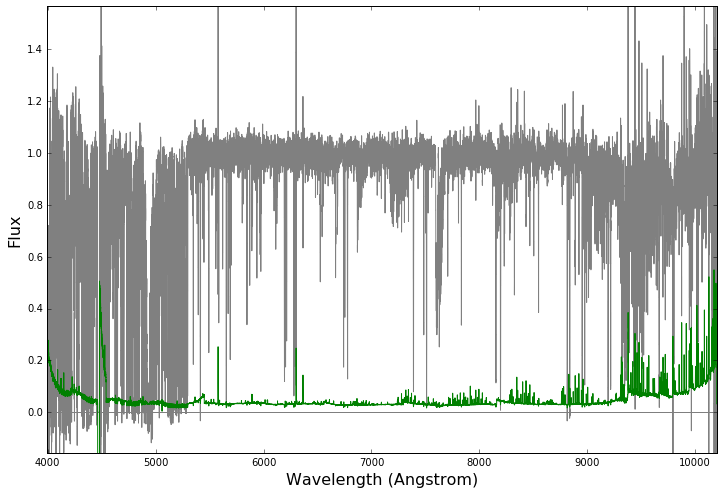

In [12]:
J2334spec.plot(inline=True)

----

## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [11]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [12]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(339.61320833, 13.90905556), (160.36441667, 2.65569444),
     (167.247, 3.19108333), ..., (230.02470833, 23.66472222),
     (124.528625, 7.32227778), (150.86345833, 22.97005556)]>

In [13]:
# Match
lls_ids = qcat.match_coord(lls_coord)

Your search yielded 1659 matches


In [14]:
# Show cat
qcat.show_cat(lls_ids)

IGM_ID    RA     DEC    zem   flag_survey sig_zem flag_zem EPOCH 
------ ------- ------- ------ ----------- ------- -------- ------
   881   0.751  16.008  3.662           1   0.002 BOSS_PCA 2000.0
   897   0.764 -10.864  3.638           1   0.001 BOSS_PCA 2000.0
  1680   1.402  13.997  3.709           1   0.002 BOSS_PCA 2000.0
  2168   1.878  16.126  3.519           1   0.002 BOSS_PCA 2000.0
  3248   2.813  14.767  4.986           1   0.003 BOSS_PCA 2000.0
  5192   4.558  14.415  4.216           1   0.001 BOSS_PCA 2000.0
  5225   4.586  14.314  3.938           1   0.004 BOSS_PCA 2000.0
  5482   4.827  15.103  4.145           1   0.003 BOSS_PCA 2000.0
  5617   4.959  -0.678  4.319           1   0.010 BOSS_PCA 2000.0
  5987   5.334  15.857  3.690           1   0.001 BOSS_PCA 2000.0
   ...     ...     ...    ...         ...     ...      ...    ...
285593 347.707  14.150  3.838           1   0.002 BOSS_PCA 2000.0
289138 351.825   0.096  3.682           1   0.004 BOSS_PCA 2000.0
290556 353

In [15]:
# Grab HD-LLS spec
LLSspec = idb.grab_spec('HD-LLS_DR1', lls_ids)

Staged 27 spectra totalling 0.09072 Gb
Loaded spectra


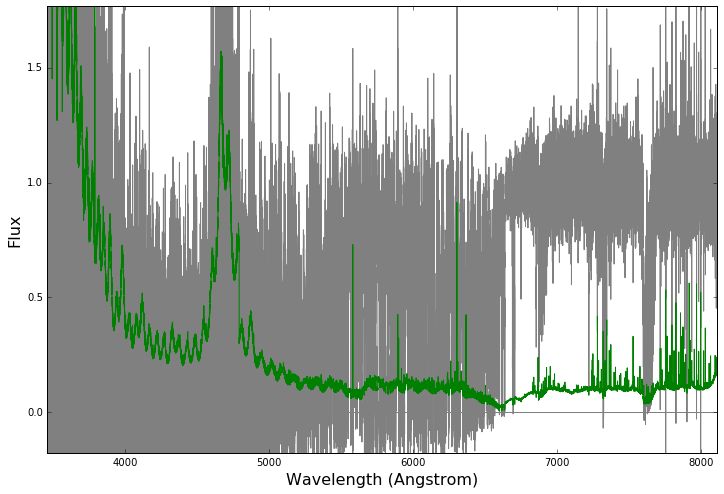

In [16]:
# Show the first spectrum
LLSspec.plot(inline=True)

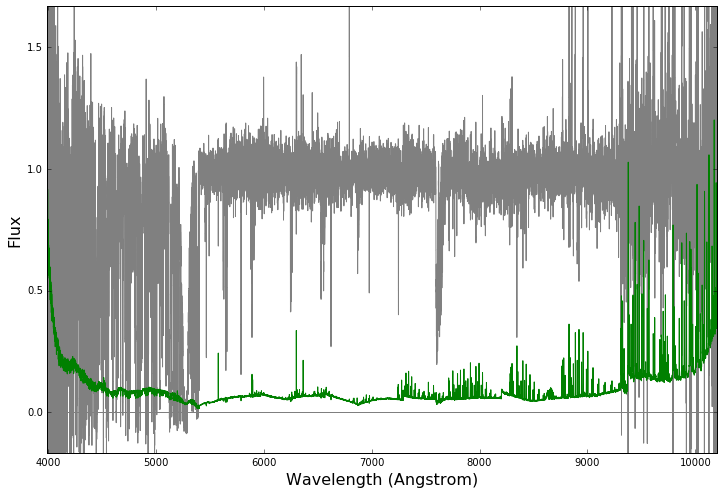

In [17]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)